# Linear Regression - Car Price Prediction

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: Read & Understand the data

In [269]:
carsDF = pd.read_csv(r'C:\Users\91730\Desktop\DFZ_Assignment\ML\LinearRegression\CarPrice-Regression.csv')
carsDF.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [270]:
carsDF.shape

(205, 26)

In [271]:
carsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [272]:
carsDF.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2: Cleaning the dataset

In [273]:
carsDF['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [274]:
# Splitting Car name to get the company name

CompanyName = carsDF['CarName'].apply(lambda x : x.split(' ')[0])
carsDF.insert(3, "CarCompany", CompanyName)
carsDF.drop(['CarName'], axis= 1, inplace= True)
carsDF.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [275]:
carsDF['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [276]:
carsDF['CarCompany'] = carsDF['CarCompany'].str.lower()

def replace_name(a,b):
    carsDF['CarCompany'].replace(a, b, inplace= True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [277]:
carsDF['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [278]:
# Checking for duplicate rows

carsDF.loc[carsDF.duplicated()]

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### Step 3: Visualizing the data

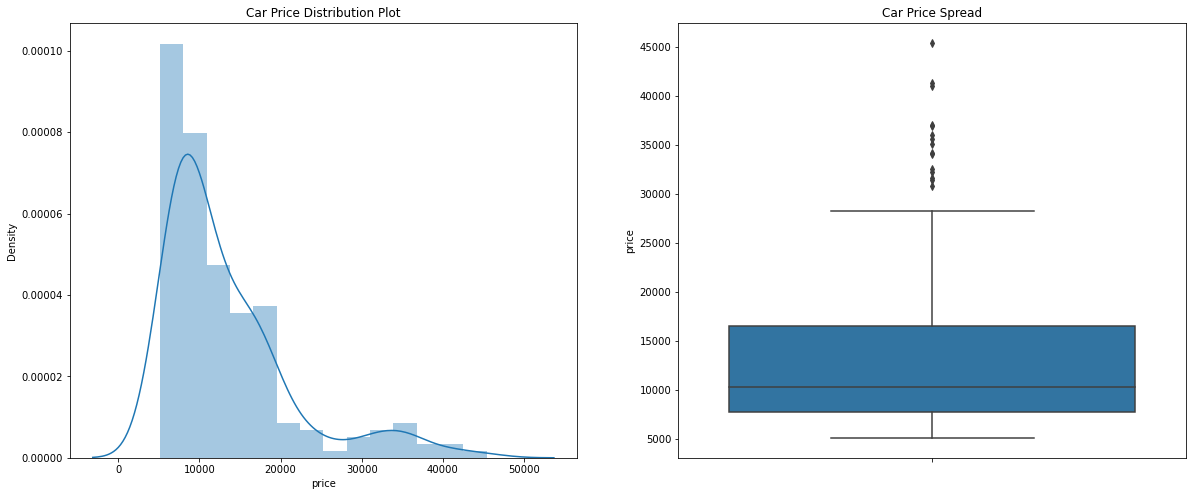

In [279]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(carsDF['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y = carsDF['price'])

plt.show()

In [280]:
print(carsDF['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Inference :
* The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
* There is a significant difference between the mean and the median of the price distribution.
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### Visualizing categorical data

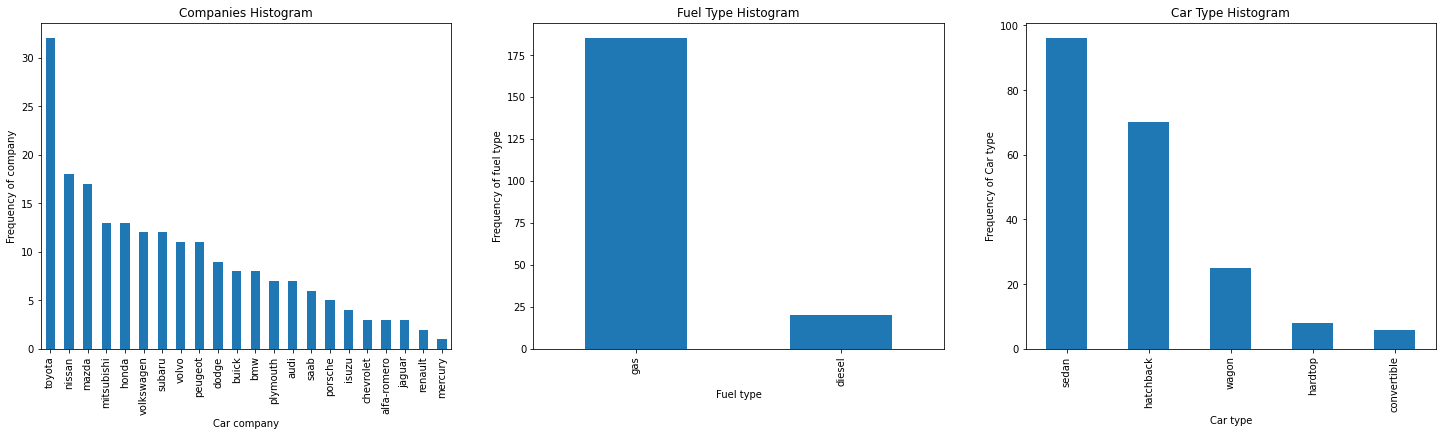

In [281]:
plt.figure(figsize= (25, 6))

plt.subplot(1,3,1)
plt1 = carsDF['CarCompany'].value_counts().plot(kind= 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel = 'Frequency of company')

plt.subplot(1,3,2)
plt1 = carsDF['fueltype'].value_counts().plot(kind= 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel type', ylabel = 'Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = carsDF['carbody'].value_counts().plot(kind= 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car type', ylabel = 'Frequency of Car type')

plt.show()

### Inference :
* Toyota seemed to be favored car company.
* Number of gas fueled cars are more than diesel.
* sedan is the top car type prefered.

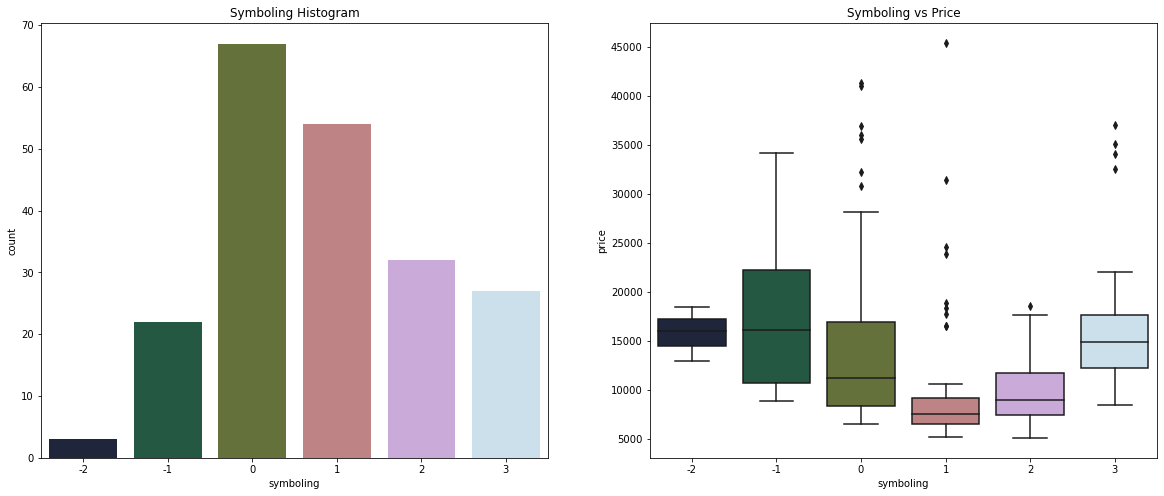

In [282]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(carsDF['symboling'], palette = ("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x = carsDF['symboling'], y = carsDF['price'], palette = ("cubehelix"))

plt.show()

### Inference :
* It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
* The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

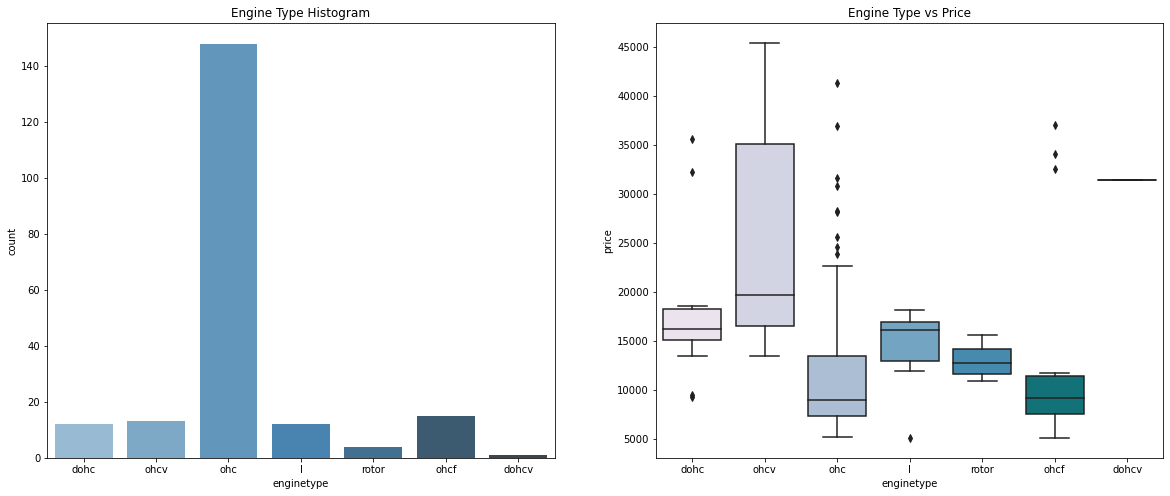

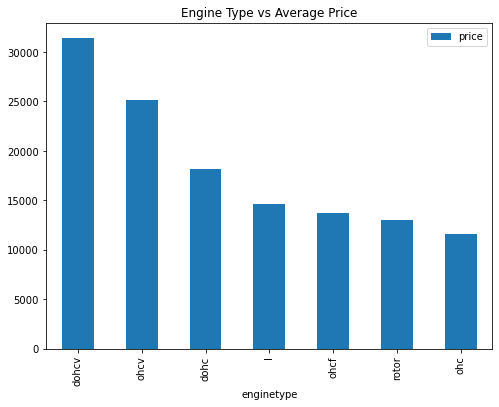

In [283]:
plt.figure(figsize= (20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(carsDF['enginetype'], palette = ("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x = carsDF['enginetype'], y = carsDF['price'], palette = ("PuBuGn"))

plt.show()

df = pd.DataFrame(carsDF.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize= (8,6))
plt.title('Engine Type vs Average Price')
plt.show()

### Inference :
* ohc Engine type seems to be most favored type.
* ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x432 with 0 Axes>

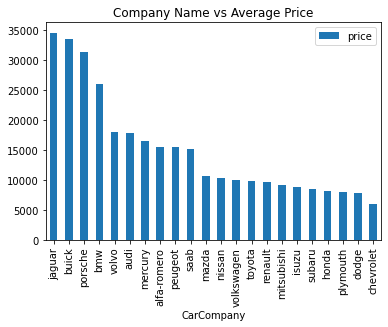

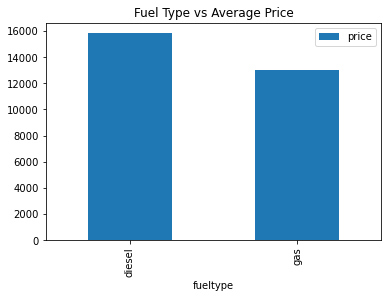

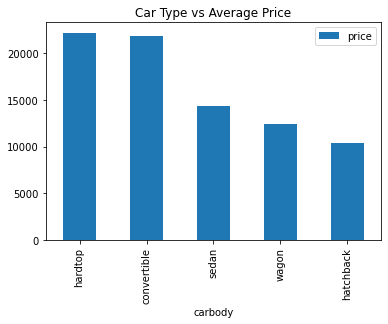

In [284]:
plt.figure(figsize= (25,6))

df = pd.DataFrame(carsDF.groupby(['CarCompany'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(carsDF.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(carsDF.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

### Inference :
* Jaguar and Buick seem to have highest average price.
* diesel has higher average price than gas.
* hardtop and convertible have higher average price.

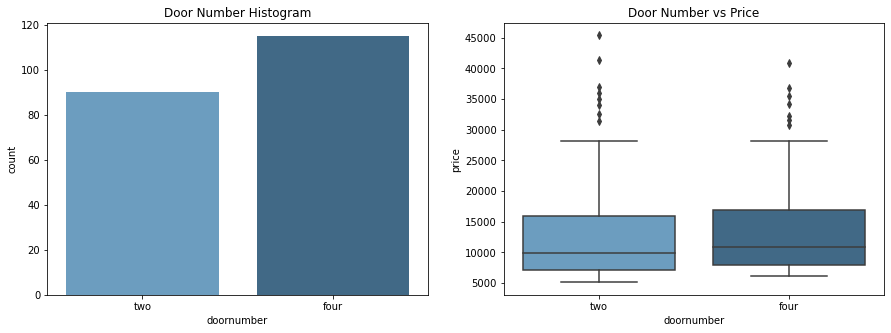

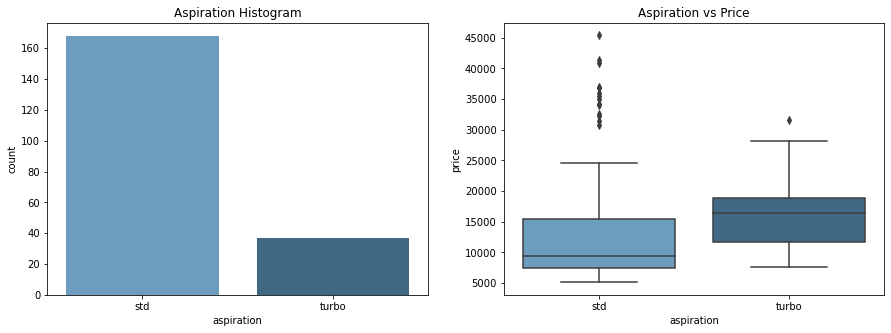

In [285]:
plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(carsDF['doornumber'], palette= ("Blues_d"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x = carsDF['doornumber'], y = carsDF['price'], palette= ("Blues_d"))

plt.show()

plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(carsDF['aspiration'], palette= ("Blues_d"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x = carsDF['aspiration'], y = carsDF['price'], palette= ("Blues_d"))

plt.show()

### Inference :
* doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
* It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers

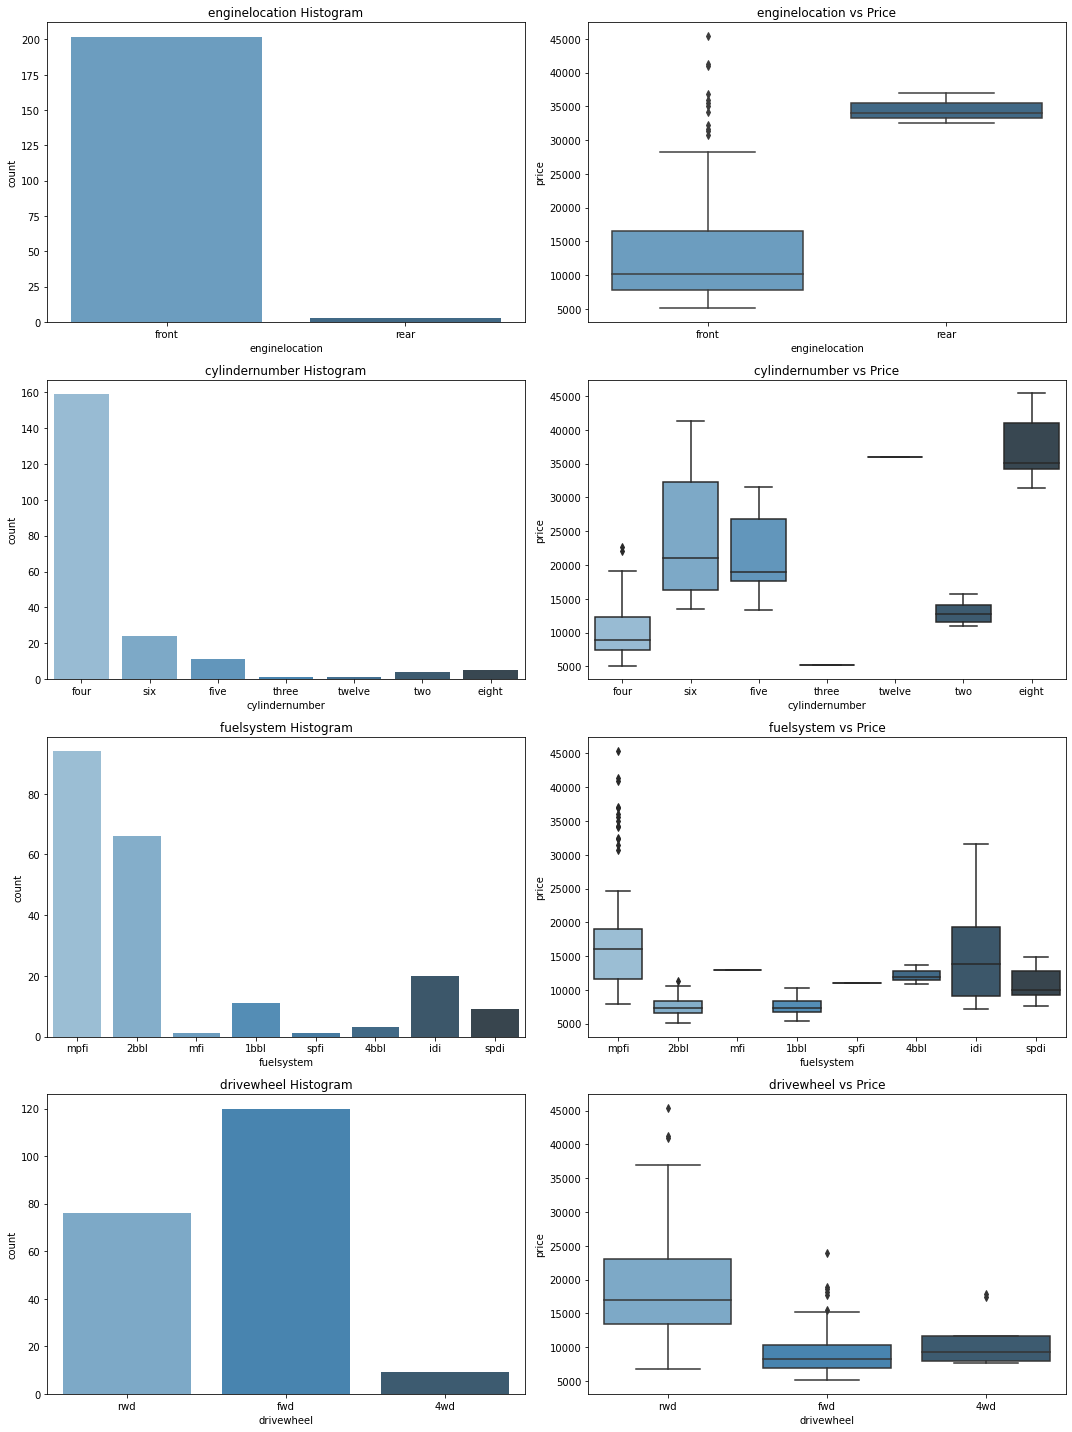

In [286]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x + ' Histogram')
    sns.countplot(carsDF[x],palette= ("Blues_d"))
    plt.subplot(4,2,(fig+1))
    plt.title(x + ' vs Price')
    sns.boxplot(x = carsDF[x], y = carsDF['price'], palette= ("Blues_d"))
    
plt.figure(figsize= (15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

### Inference :
* Very few datapoints for enginelocation categories to make an inference.
* Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
* mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
* A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

#### Visualizing numerical data

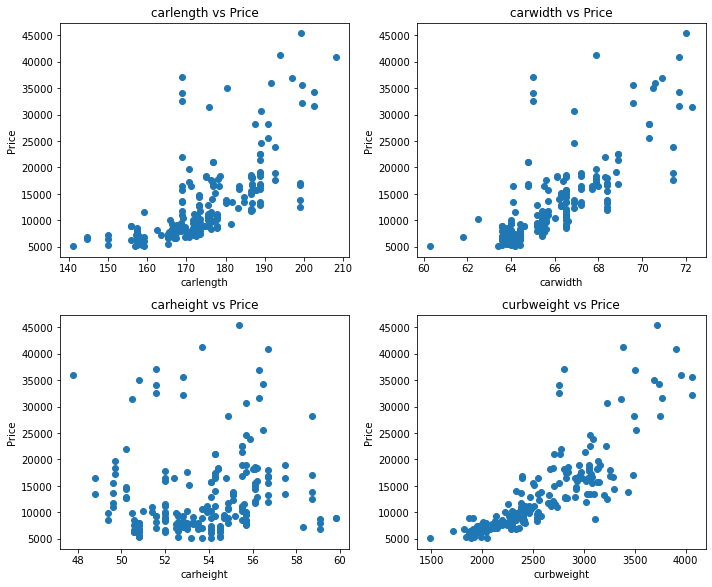

In [287]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(carsDF[x],carsDF['price'])
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

### Inference :
* carwidth, carlength and curbweight seems to have a poitive correlation with price.
* carheight doesn't show any significant trend with price.

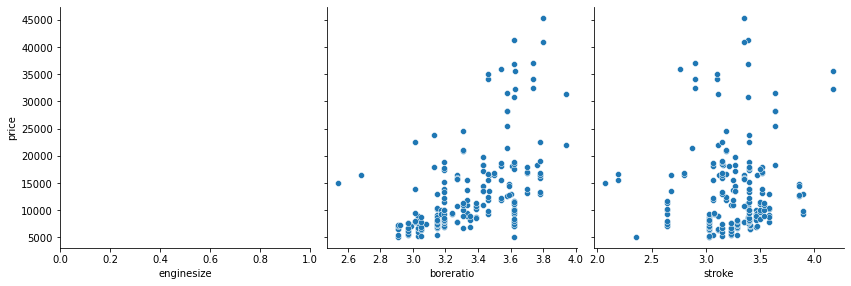

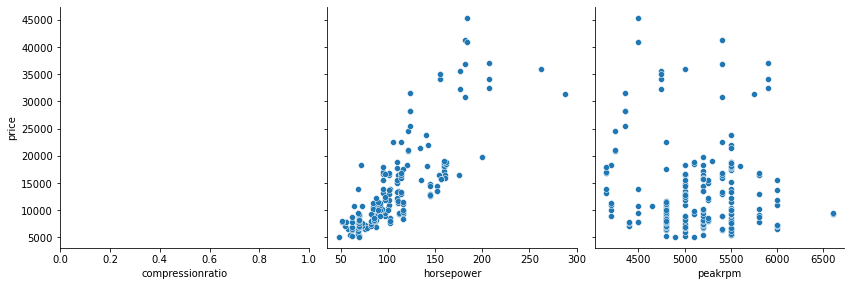

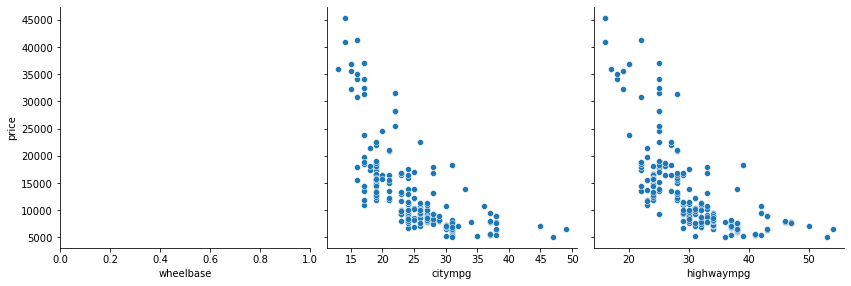

In [288]:
def pp(x,y,z):
    sns.pairplot(carsDF, x_vars = [x,y,z], y_vars = 'price', height= 4, aspect= 1, kind= 'scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')


### Inference :
* enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
* citympg, highwaympg - seem to have a significant negative correlation with price.

In [289]:
np.corrcoef(carsDF['carlength'], carsDF['carwidth'])[0, 1]

0.841118268481846

### Step 4: Deriving new features

In [290]:
#Fuel economy

carsDF['fueleconomy'] = (0.55 * carsDF['citympg']) + (0.45 * carsDF['highwaympg'])

In [291]:
#Binning the Car Companies based on avg prices of each Company.

carsDF['price'] = carsDF['price'].astype('int')
temp = carsDF.copy()
table = temp.groupby(['CarCompany'])['price'].mean()
temp = temp.merge(table.reset_index(), how= 'left', on= 'CarCompany')
bins = [0, 10000, 20000, 40000]
carsDF_bin=['Budget','Medium','Highend']
carsDF['carsrange'] = pd.cut(temp['price_y'], bins, right= False, labels= carsDF_bin)
carsDF.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Step 5: Bivariate Analysis

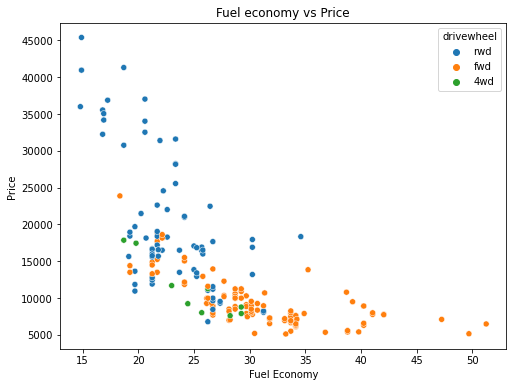

In [292]:
plt.figure(figsize= (8,6))
plt.title('Fuel economy vs Price')
sns.scatterplot(x= carsDF['fueleconomy'], y= carsDF['price'], hue=carsDF['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()

### Inference :
* fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 1440x432 with 0 Axes>

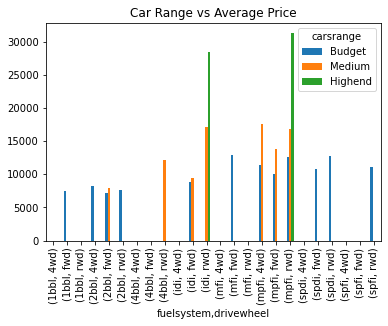

In [293]:
plt.figure(figsize= (20, 6))
df = pd.DataFrame(carsDF.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### Inference :
* High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

### List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy

In [294]:
cars_lr = carsDF[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


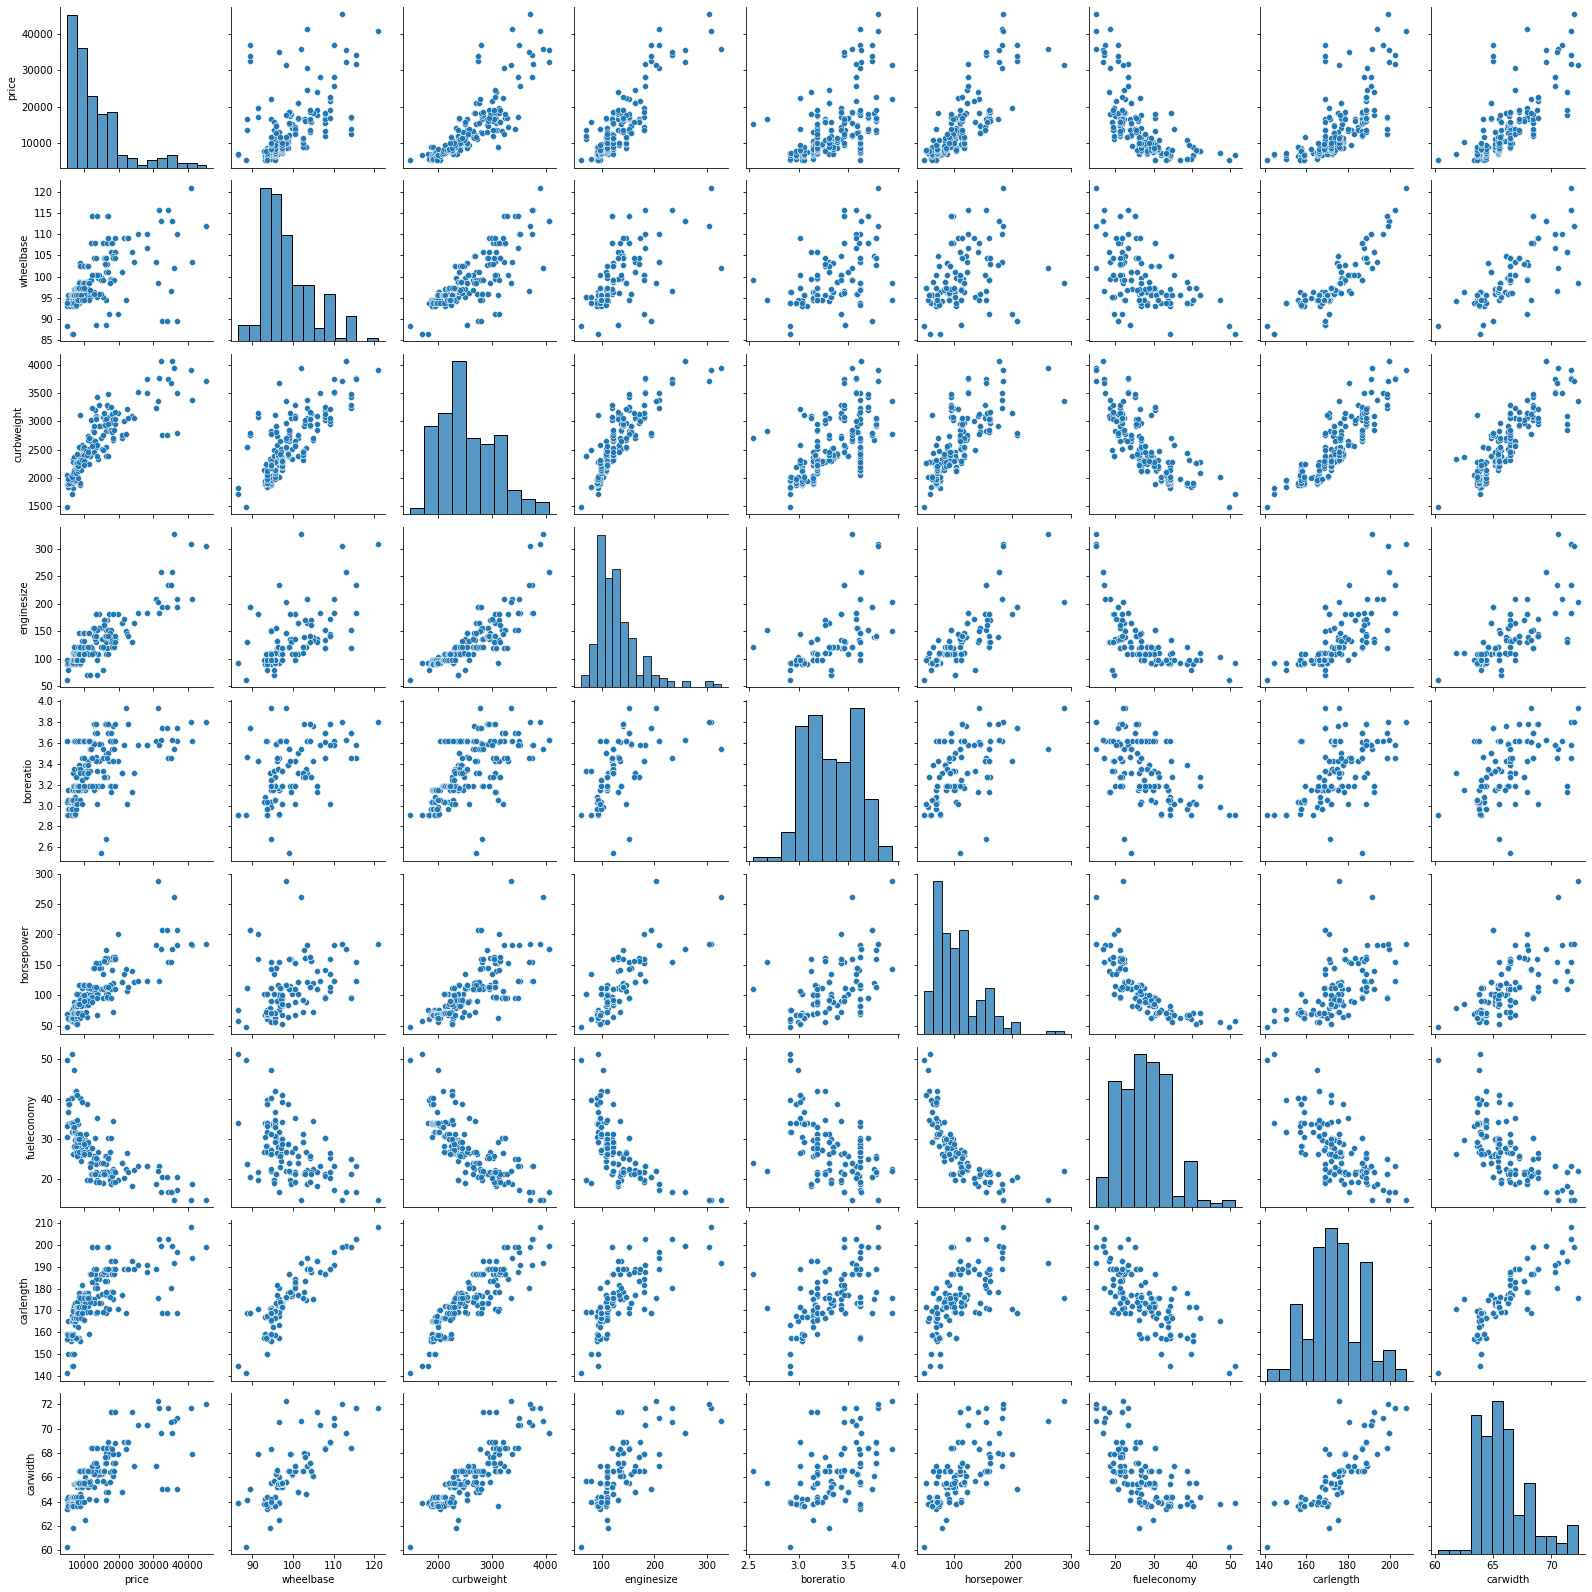

In [295]:
sns.pairplot(cars_lr)
plt.show()

### Step 6: Dummification of Variables

In [296]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [297]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [298]:
cars_lr.shape

(205, 31)

### Step 7: Train-Test Split and feature scaling

In [299]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [300]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [301]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [302]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


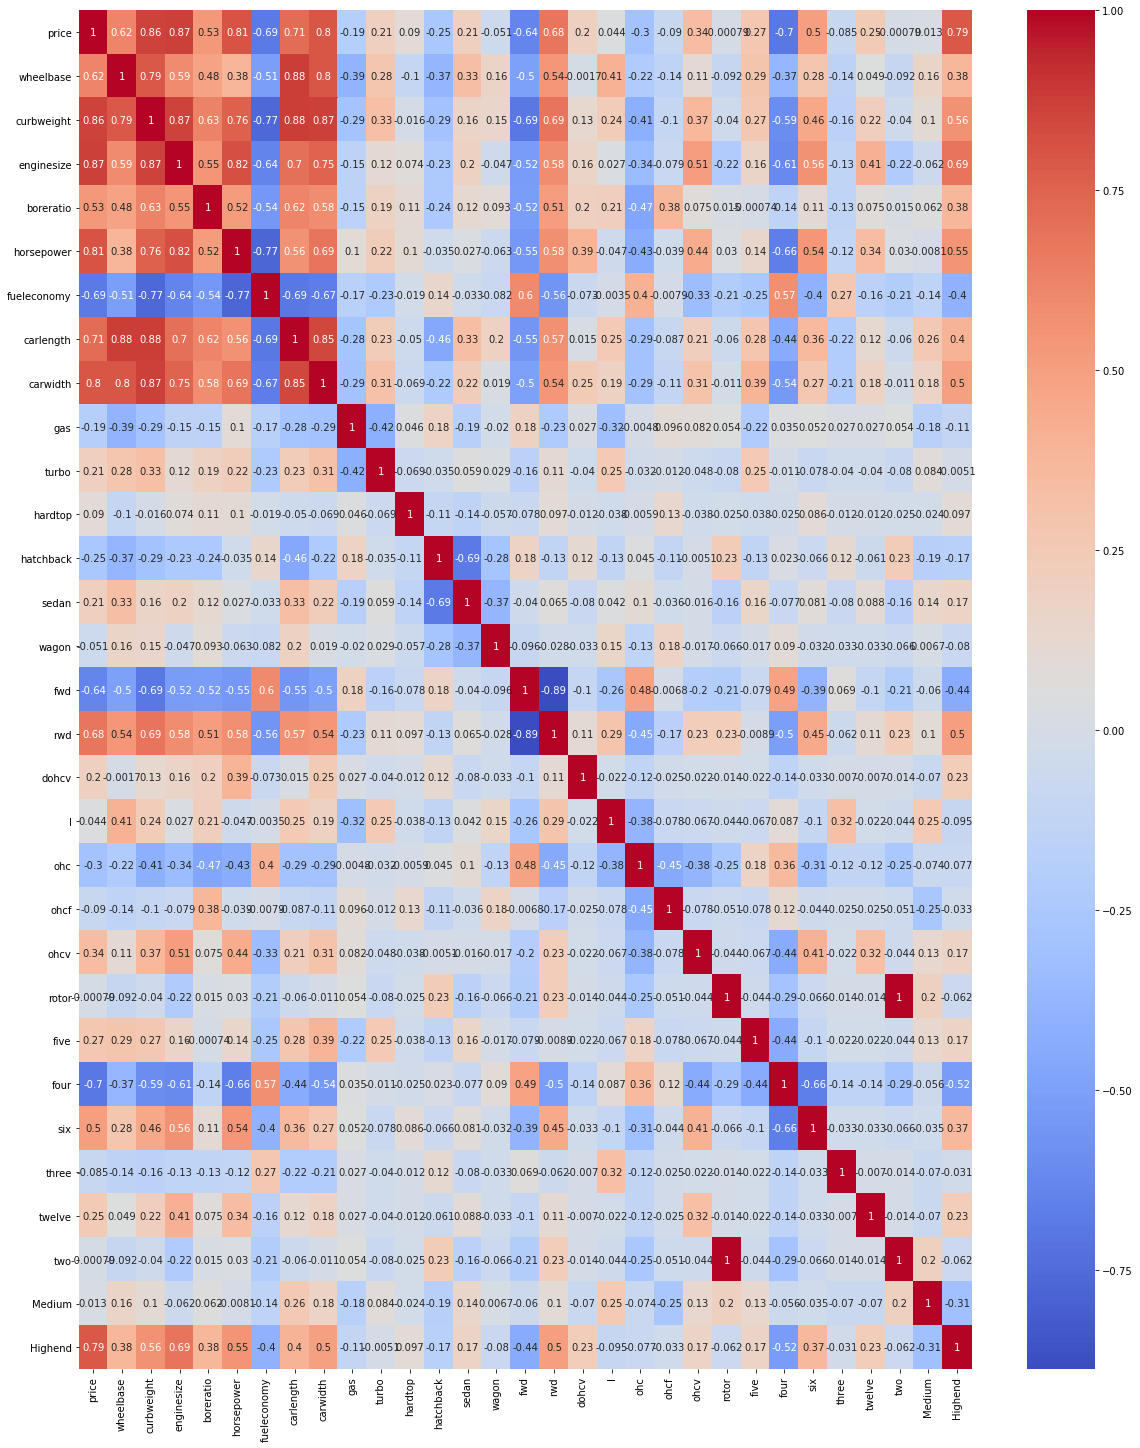

In [303]:
#Correlation using heatmap

plt.figure(figsize = (20,25))
sns.heatmap(df_train.corr(), annot = True, cmap= "coolwarm")
plt.show()

In [304]:
#Dividing data into X and y variables

y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,...,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,...,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,...,0,0,0,1,0,0,0,0,1,0


### Step 8: Model Building

#### Model 1

In [305]:
# The API focuses on models and the most frequently used statistical test, and tools.

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train[['wheelbase']])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     89.25
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.03e-16
Time:                        23:42:10   Log-Likelihood:                 52.012
No. Observations:                 143   AIC:                            -100.0
Df Residuals:                     141   BIC:                            -94.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0492      0.032     -1.550      0.123      -0.112       0.014
wheelbase      0.6532      0.069      9.447      0.000       0.516       0.790
==============================================================================
Omnibus:                       81.027   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.438
Skew:                           2.161   Prob(JB):                     6.49e-73
Kurtosis:                       9.092   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

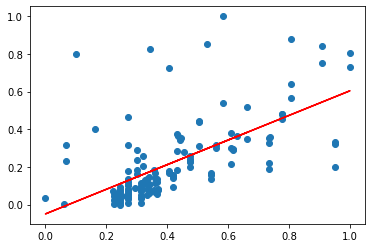

In [306]:
#Plot of wheelbase on x-axis and price on y-axis

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.0492 + 0.6532 * X_train_lm.iloc[:, 1], 'r')
plt.show()

In [307]:
# Assign more feature variables to X

X_train_lm = sm.add_constant(X_train[['wheelbase', 'curbweight', 'enginesize']])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     188.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           8.38e-49
Time:                        23:42:10   Log-Likelihood:                 133.03
No. Observations:                 143   AIC:                            -258.1
Df Residuals:                     139   BIC:                            -246.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1244      0.019     -6.644      0.000      -0.161      -0.087
wheelbase     -0.0422      0.068     -0.617      0.539      -0.177       0.093
curbweight     0.4967      0.107      4.631      0.000       0.285       0.709
enginesize     0.6565      0.110      5.942      0.000       0.438       0.875
==============================================================================
Omnibus:                       33.906   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.515
Skew:                           0.968   Prob(JB):                     5.42e-18
Kurtosis:                       6.098   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 2

In [308]:
#Build a linear model

X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     72.82
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.66e-60
Time:                        23:42:10   Log-Likelihood:                 230.02
No. Observations:                 143   AIC:                            -400.0
Df Residuals:                     113   BIC:                            -311.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0065      0.118     -0.055      0.956      -0.239       0.226
wheelbase       0.1099      0.073      1.505      0.135      -0.035       0.255
curbweight      0.2857      0.134      2.133      0.035       0.020       0.551
enginesize      0.0451      0.182      0.247      0.805      -0.316       0.407
boreratio      -0.1051      0.070     -1.510      0.134      -0.243       0.033
horsepower      0.6070      0.124      4.879      0.000       0.361       0.853
fueleconomy     0.1339      0.077      1.731      0.086      -0.019       0.287
carlength      -0.0568      0.097     -0.585      0.560      -0.249       0.136
carwidth        0.2081      0.086      2.422      0.017       0.038       0.378
gas            -0.0204      0.033     -0.623      0.535      -0.085       0.044
turbo          -0.0097      0.021     -0.456      0.649      -0.052       0.033
hardtop        -0.0994      0.053     -1.885      0.062      -0.204       0.005
hatchback      -0.1388      0.041     -3.393      0.001      -0.220      -0.058
sedan          -0.1209      0.043     -2.820      0.006      -0.206      -0.036
wagon          -0.1402      0.045     -3.083      0.003      -0.230      -0.050
fwd            -0.0181      0.027     -0.668      0.505      -0.072       0.036
rwd             0.0149      0.032      0.474      0.637      -0.048       0.077
dohcv          -0.3306      0.116     -2.853      0.005      -0.560      -0.101
l              -0.0029      0.038     -0.078      0.938      -0.077       0.072
ohc             0.0755      0.028      2.733      0.007       0.021       0.130
ohcf            0.1160      0.044      2.666      0.009       0.030       0.202
ohcv           -0.0426      0.037     -1.161      0.248      -0.115       0.030
rotor          -0.0002      0.056     -0.004      0.997      -0.111       0.111
five           -0.1236      0.075     -1.641      0.104      -0.273       0.026
four           -0.1046      0.086     -1.210      0.229      -0.276       0.067
six            -0.0827      0.062     -1.344      0.182      -0.205       0.039
three           0.0718      0.122      0.588      0.558      -0.170       0.313
twelve         -0.1752      0.094     -1.861      0.065      -0.362       0.011
two            -0.0002      0.056     -0.004      0.997      -0.111       0.111
Medium          0.0455      0.014      3.176      0.002       0.017       0.074
Highend         0.2261      0.028      8.109      0.000       0.171       0.281
==============================================================================
Omnibus:                       48.098   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.650
Skew:                           1.221   Prob(JB):                     1.76e-36
Kurtosis:                       7.655   Cond. N

#### VIF for Model 2

In [309]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,two,inf
22,rotor,inf
0,const,665.89
24,four,68.99
2,curbweight,38.30
3,enginesize,38.06
13,sedan,22.08
25,six,21.02
5,horsepower,20.28
7,carlength,18.94


In [310]:
# Dropping the variables/insignificant variables that is not of much use

X = X_train.drop('carlength', 1,)

#### Model 3

In [311]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     75.85
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           4.91e-61
Time:                        23:42:10   Log-Likelihood:                 229.80
No. Observations:                 143   AIC:                            -401.6
Df Residuals:                     114   BIC:                            -315.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0231      0.114     -0.203      0.840      -0.248       0.202
wheelbase       0.0976      0.070      1.399      0.164      -0.041       0.236
curbweight      0.2580      0.125      2.066      0.041       0.011       0.505
enginesize      0.0696      0.177      0.393      0.695      -0.281       0.420
boreratio      -0.1175      0.066     -1.779      0.078      -0.248       0.013
horsepower      0.6070      0.124      4.893      0.000       0.361       0.853
fueleconomy     0.1457      0.074      1.956      0.053      -0.002       0.293
carwidth        0.1934      0.082      2.360      0.020       0.031       0.356
gas            -0.0181      0.032     -0.559      0.577      -0.082       0.046
turbo          -0.0062      0.020     -0.306      0.760      -0.047       0.034
hardtop        -0.1052      0.052     -2.040      0.044      -0.207      -0.003
hatchback      -0.1430      0.040     -3.558      0.001      -0.223      -0.063
sedan          -0.1286      0.041     -3.159      0.002      -0.209      -0.048
wagon          -0.1485      0.043     -3.450      0.001      -0.234      -0.063
fwd            -0.0206      0.027     -0.775      0.440      -0.073       0.032
rwd             0.0141      0.031      0.449      0.654      -0.048       0.076
dohcv          -0.3083      0.109     -2.825      0.006      -0.525      -0.092
l               0.0025      0.036      0.069      0.945      -0.069       0.074
ohc             0.0775      0.027      2.832      0.005       0.023       0.132
ohcf            0.1216      0.042      2.874      0.005       0.038       0.205
ohcv           -0.0356      0.035     -1.030      0.305      -0.104       0.033
rotor           0.0097      0.053      0.182      0.856      -0.096       0.115
five           -0.1131      0.073     -1.550      0.124      -0.258       0.031
four           -0.0947      0.085     -1.121      0.265      -0.262       0.073
six            -0.0772      0.061     -1.273      0.206      -0.197       0.043
three           0.0790      0.121      0.653      0.515      -0.161       0.319
twelve         -0.1785      0.094     -1.904      0.059      -0.364       0.007
two             0.0097      0.053      0.182      0.856      -0.096       0.115
Medium          0.0432      0.014      3.146      0.002       0.016       0.070
Highend         0.2279      0.028      8.253      0.000       0.173       0.283
==============================================================================
Omnibus:                       46.198   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.635
Skew:                           1.196   Prob(JB):                     8.74e-33
Kurtosis:                       7.366   Cond. No.                     1.13e+16
================================================

#### VIF for Model 3

In [312]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,two,inf
20,rotor,inf
1,curbweight,146.19
22,four,142.19
2,enginesize,110.44
6,carwidth,79.88
4,horsepower,58.77
3,boreratio,50.54
0,wheelbase,49.70
11,sedan,38.08


### Step 9: Residual Analysis of the train data

In [255]:
y_train_price = lr_2.predict(X_train_lm)

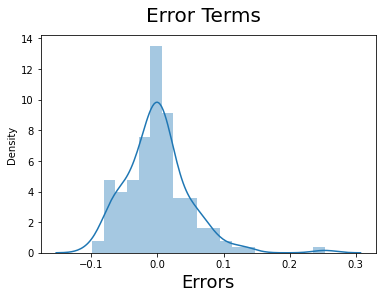

In [256]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)     #Compute the residuals and draw histgogram
fig.suptitle('Error Terms', fontsize = 20)            
plt.xlabel('Errors', fontsize = 18)                    
plt.show()

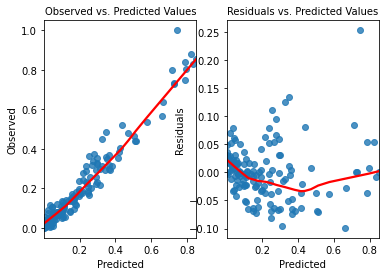

In [257]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()     #Predict y_train from the model
    resids = model.resid              #Error

    fig, ax = plt.subplots(1,2)
    #this curve sia plot of predicted values and training data -actual prices
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=10)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    # this curce is a plot between predicted values and residuals
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=10)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lr_2, y_train)    
#residual vs predicted values do not show a pattern so data is heteroscadastic

### Durbin Watson Test

(143,)


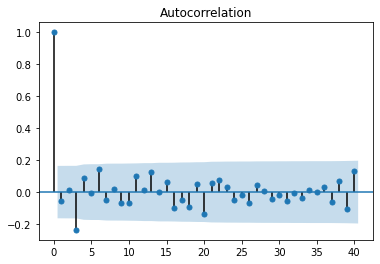

In [258]:
import statsmodels.tsa.api as smt
print(lr_2.resid.shape)
acf = smt.graphics.plot_acf(lr_2.resid, lags=40, alpha=0.05)
acf.show()

In [259]:
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
160,7738,95.7,2094,98,3.19,70,42.05,166.3,64.4,1,...,0,0,0,1,0,0,0,0,0,0
186,8495,97.3,2275,109,3.19,85,30.15,171.7,65.5,1,...,0,0,0,1,0,0,0,0,1,0
59,8845,98.8,2385,122,3.39,84,28.70,177.8,66.5,1,...,0,0,0,1,0,0,0,0,1,0
165,9298,94.5,2265,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
140,7603,93.3,2240,108,3.62,73,28.25,157.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0


### Step 10: Making Predictions Using the Final Model

In [260]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [261]:
y_test = df_test.pop('price')
X_test = df_test

In [262]:
# Adding constant variable to test dataframe

X_test_m2 = sm.add_constant(X_test)

In [263]:
# Creating X_test_m2 dataframe by dropping variables from X_test_m2

X_test_m2 = X_test_m2.drop(["carlength"], axis = 1)

In [264]:
y_pred_m2 = lr_2.predict(X_test_m2)

### Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

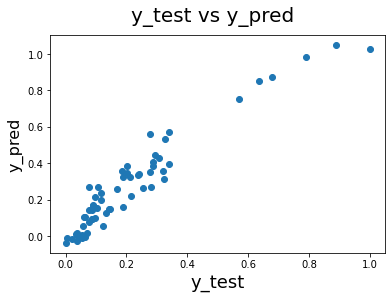

In [265]:
# Plotting y_test and y_pred to understand the spread

import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'Residuals')

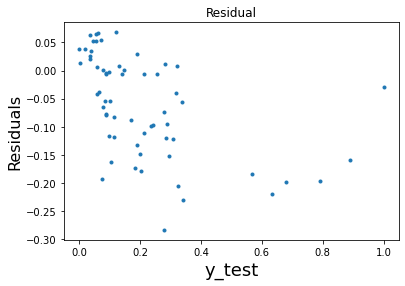

In [266]:
# Plotting y_test and residual to understand the spread

fig = plt.figure()
plt.plot(y_test , y_test-y_pred_m2, '.')
plt.title("Residual")
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('Residuals', fontsize = 16)      

### Homoscedasticity (equal variance) of residuals

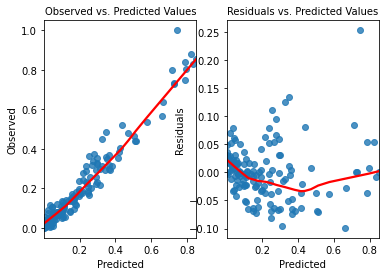

In [267]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()    #predic y_train from the model
    resids = model.resid             #abs(actual-predicted)

    fig, ax = plt.subplots(1,2)
    #this curve sia plot of predicted values and training data -actual prices
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=10)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    # this curce is a plot between predicted values and residuals
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=10)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lr_2, y_train)    
#residual vs predicted values do not show a pattern so data is homoscadastic

#### Inference:
* We can see that the model 3 predicts the price well